# Instruções

Enviar para o email filipe.furlan@letscode.com.br até 2021/07/27 as 16:00 o notebook preenchido (avalicao_banco_de_dados_firstname_lastname.ipynb) com a resolução dos exercicios abaixo.

Use as ferramentas de costume para resolver os problemas e copie/cole as soluções no notebook.

**OBS:** Não deixe de pedir ajuda o mais rápido possível caso não consiga configurar a base de dados ou tenha problemas com o notebook.

# Criando a base de dados (0,0)

Crie um schema `hr` no pagAdmin4 e execute o arquivo `hr_database.sql` para criar as tabelas. 

# Explorando o dataset. (2,0) - 2,0

## (0,5)

0.5

Quais são as chave primária, estrangeria e indices de cada tabela?  (0,5)

> 

countries:
PK: country_id
FK: region_id

departments:
PK: department_id
FK: location_id

dependents:
PK: dependent_id
FK: employee_id

employees:
PK: employee_id
FK1: job_id
FK2: manager_id
FK3: department_id
indíce: employeeindex

jobs:
PK: job_id
índice: jobindex

locations:
PK: location_id
FK: country_id

regions:
PK: region_id

## (1,5)

Faça um EDR (também conhecido como modelo entidade relacionamento   - MER) dessa base e anxe o resultado abaixo.

> 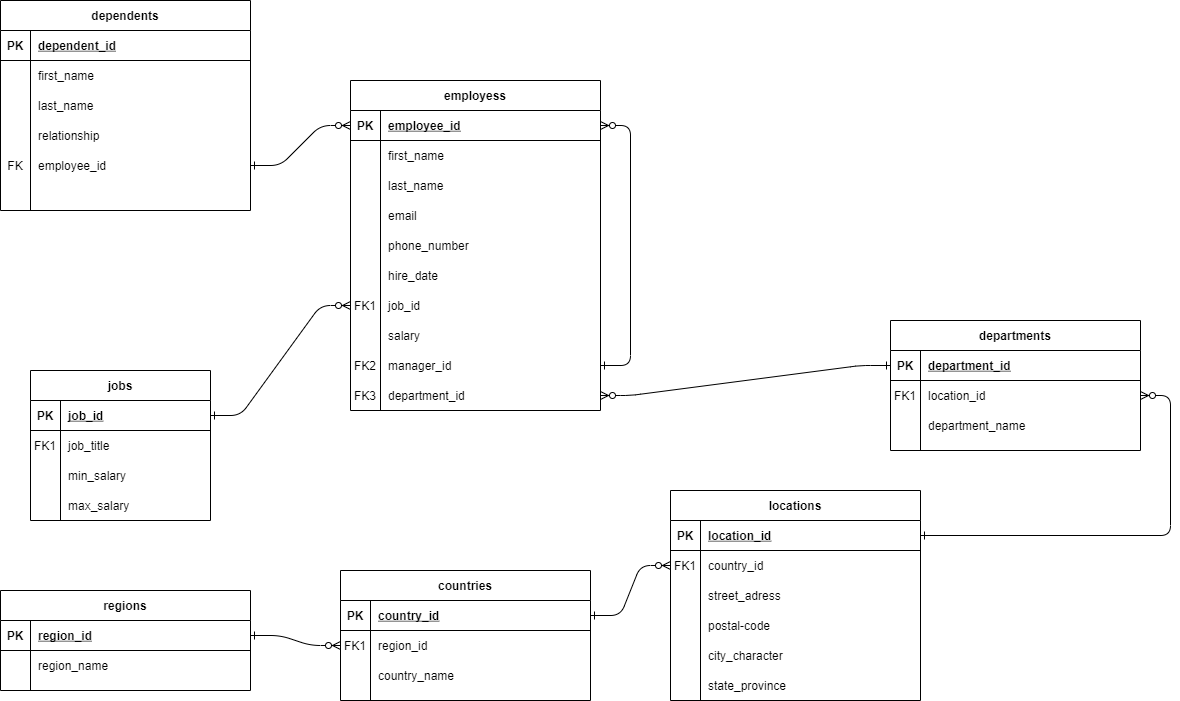


# Alguns conceitos. (1,0) - 1,0

## (0,5)

Explique com suas palavras qual a vantagem de usarmos indices e por que não devemos indexar todas as colunas.

> Com o uso de índices, as consultas realizadas são otimizadas, tornando-se muito mais rápidas. Contudo, os índices ocupam mais memória, então o melhor é verificar em quais colunas serão realizadas mais consultas para indexar as mesmas.

##  (0,5)

Ambas clausulas `WHERE` e `HAVING` são usadas para filtras linhas especifícas no comando `SELECT`. Qual a diferença entre eles?

> WHERE é utilizado qundo não há agrupamento, pois o mesmo filtra por cada coluna. HAVING é utilizado quando há agrupamento.

# Relatórios (5,0) - 4,9

##  (1,0)

1,0

Num estudo para melhorar os gastos com logistica, foi perguntado ao time de dados:

1. Em quantos países a empresa está presente, de acordo com os dados da tabela `location`? (0,5)


Query:

``` mysql
SELECT COUNT(DISTINCT(country_id)) AS paises_presentes FROM locations;
``` 

Resultado:

> 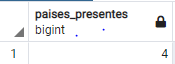

2. Em quais cidades inglesas e alemãs a empresa está presente? (0,5)

Query:
``` mysql
SELECT city AS cidade, country_id AS pais FROM locations
WHERE country_id = 'UK' or country_id = 'DE';
``` 

Resultado:

> 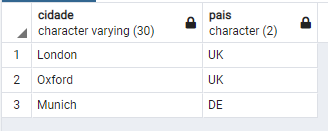

## (1,0)

0,9

Nome das colunas diferente do especificado.

Não precisa usar view, mas nada foi descontado por isso! :)

Faça um relatório que traga o nome completo do colaborador e o número de dependentes (`colaborador | dependentes`). Importante que os colaboradores que não tem dependentes também apareçam na lista. A lista deve ser ordenada pelo número de dependentes, do maior para o menor e em seguida por ordem alfabética. 

Query:
``` mysql
 CREATE OR REPLACE VIEW dependentes AS (
SELECT emp.first_name, emp.last_name, dep.dependent_id FROM
employees emp LEFT JOIN dependents dep ON emp.employee_id = dep.employee_id
);

 SELECT CONCAT(first_name, ' ', last_name) AS nome, COUNT(dependent_id) AS numero_dependentes FROM dependentes
GROUP BY nome
ORDER BY numero_dependentes DESC, nome
``` 

Resultado:

> 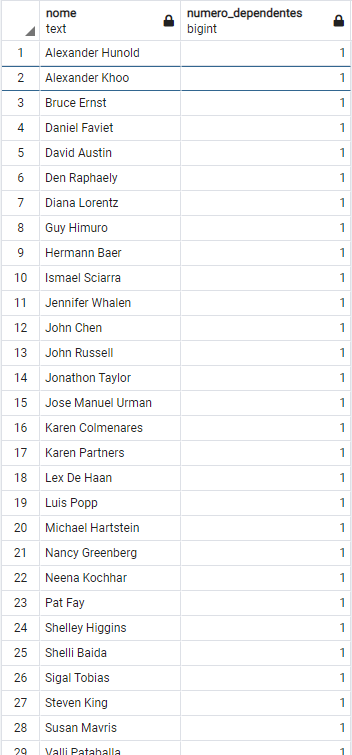
> 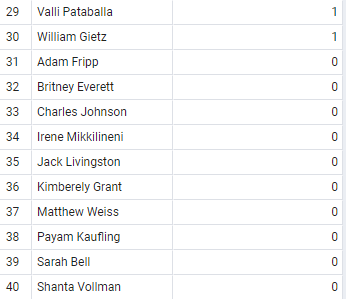

## (1,0)

1,0

1. Muito bom com as duas soluções, mas na prática você usará mais a primeira.

O RH quer premiar os colaboradores que estão a 25 anos ou mais na empresa. Crie uma coluna `premio` na tabela `employees` que traga a palavra BONUS para os colaboredes que fazem jus ao prêmio e ESPERAR para os que não  fazem.

Query:
``` mysql
 -- Criando uma visualização temporária 
SELECT *,  
CASE
WHEN DATE_PART('year', AGE(hire_date)) >= 25 THEN 'BONUS'
WHEN DATE_PART('year', AGE(hire_date)) < 25 THEN 'ESPERAR'
END AS premio
FROM employees

 -- Alterando a tabela

 ALTER TABLE employees
ADD COLUMN premio VARCHAR(10);

>UPDATE employees SET premio = 
CASE
WHEN DATE_PART('year', AGE(hire_date)) >= 25 THEN 'BONUS'
WHEN DATE_PART('year', AGE(hire_date)) < 25 THEN 'ESPERAR'
END;

SELECT * FROM employees;
```

Resultado:

> 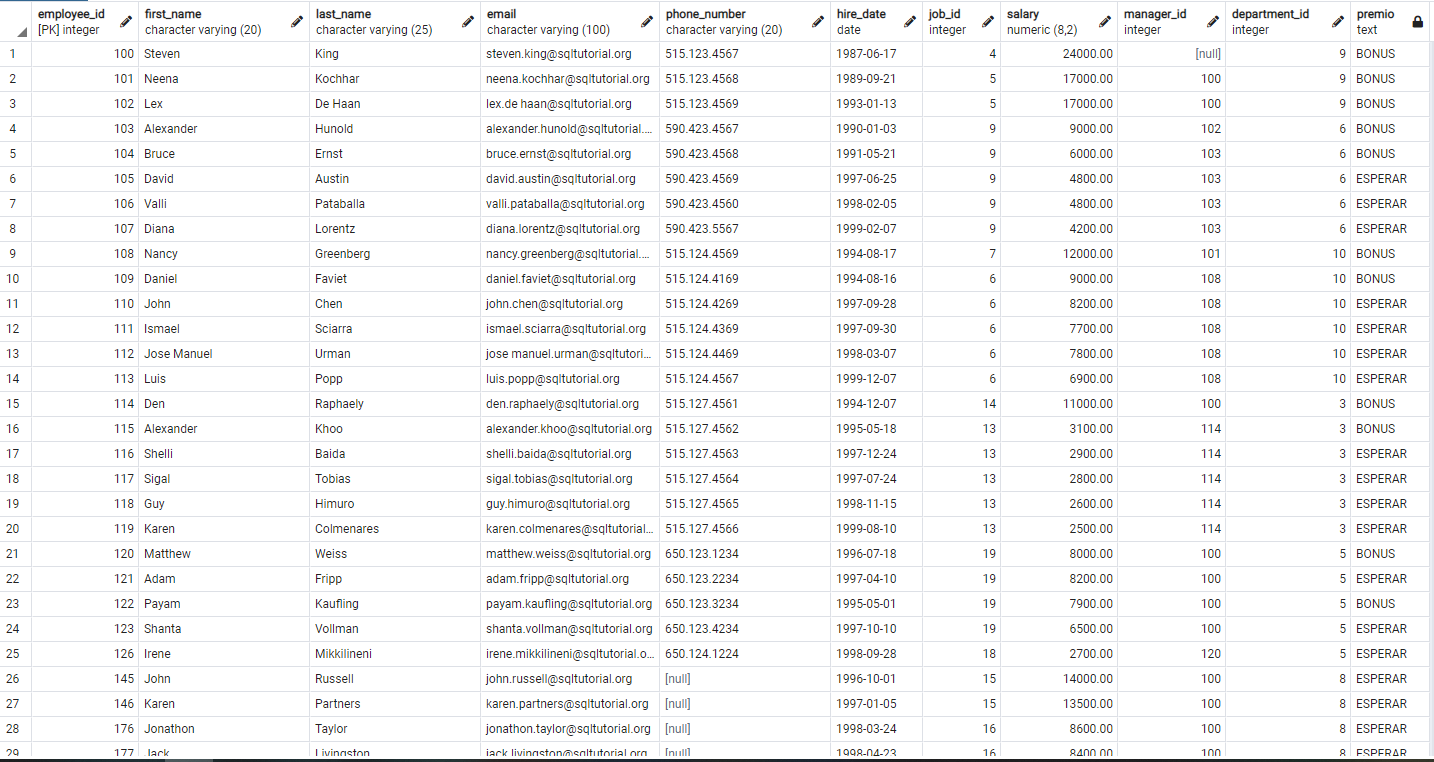

##  (2,0)

2,0

A empresa está passando por uma reestruturação e precisa saber quantos funcionários estão alocados em cada departamento, bem como o total e a média de salários deles. Faça um relatório no formato `nome_departamento | numero_funcionarios | salario_total | salario_medio` ordenado por salario medio, do maior para o menor. Os números decimais devem conter duas casas após a virgula. (2,0)

- Criar a query corretamente com apenas uma métrica (numero_funcionarios ou salario_total ou salario_medio)  (1,0)
- Criar as outras duas métricas (+ 0,25 cada)
- Ordernar corretamente (+ 0,25)
- Deixar os numeros decimais com duas casas (+ 0,25)

Query:
``` mysql
CREATE OR REPLACE VIEW departamentos_funcionarios AS(
	SELECT dp.department_name AS departamento, em.employee_id AS funcionario_id, em.salary AS salario
	FROM departments dp LEFT JOIN employees em ON em.department_id = dp.department_id);
	
SELECT departamento, COUNT(DISTINCT(funcionario_id)) AS numero_funcionarios, SUM(salario) AS salario_total, ROUND(AVG(salario), 2) AS salario_medio 
FROM departamentos_funcionarios
GROUP BY departamento
ORDER BY salario_medio DESC
``` 

Resultado:
> 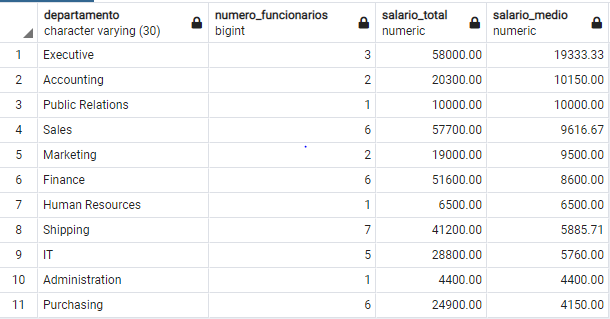

# Arrumando a query dos outros (2,0) - 2,0

Seu colega de departamento estava trabahando num relatório para descobrir quais os três departamentos que mais gastam com salários (e o respectivo valor total de cada um) e em que paises eles estão localizados. No dia da entrega ele ficou doente e pediu sua jauda para completar a tarefa. Ele te mandou a query abaixo por email e informou que, além de deixar o relatório no formato pedido, a query contém um bug que ele ainda não encontrou. Conclua a tarefa do seu colega.  (2,0)

Query enviada:

    WITH temp_table as(
    SELECT 
    dep.location_id,
    dep.department_name nome_departamento, 
    SUM(emp.salary) salario_total
    FROM departments dep
    JOIN employees emp on emp.department_id = dep.department_id
    GROUP BY dep.location_id, dep.department_name
    ORDER BY 3 DESC
    LIMIT 10)
    Select tt.*, cnt.country_name
    from temp_table as tt 
    join locations loc on loc.location_id = cnt.location_id
    join countries cnt on cnt.country_id = tt.country_id
    order by 2 DESC;

Query:
``` mysql
WITH temp_table as(
SELECT 
dep.location_id,
dep.department_name nome_departamento, 
SUM(emp.salary) salario_total
FROM departments dep
JOIN employees emp on emp.department_id = dep.department_id
GROUP BY dep.location_id, dep.department_name
ORDER BY 3 DESC
LIMIT 10)
Select tt.*, cnt.country_name
from temp_table as tt 
join locations loc on loc.location_id = tt.location_id
join countries cnt on cnt.country_id = loc.country_id
order by tt.salario_total DESC
limit 3;
```

Resultado:

> 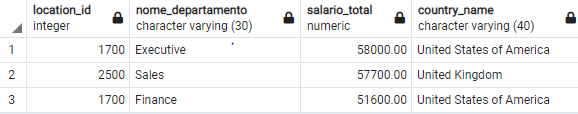

# Nota: 9,9 - Excelente!